In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from google.colab import files
import io
from sklearn.model_selection import train_test_split

In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [4]:
df.head()

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
0,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
1,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
2,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
3,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
4,13,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169486 entries, 0 to 169485
Columns: 132 entries, id to target
dtypes: float64(15), int64(1), object(116)
memory usage: 170.7+ MB


In [6]:
df.isnull().sum()

id         0
col_1      0
col_2      0
col_3      0
col_4      0
          ..
col_127    0
col_128    0
col_129    0
col_130    0
target     0
Length: 132, dtype: int64

In [7]:
df.describe()

,id,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
count,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000,169486.000000
mean,294137.197969,0.493883,0.507475,0.498877,0.492029,0.487633,0.490836,0.484902,0.486432,0.485478,0.498000,0.493545,0.493187,0.492988,0.495865,3044.006201
std,169335.935266,0.187647,0.207174,0.202214,0.211372,0.209080,0.205197,0.178560,0.199323,0.181660,0.185828,0.209774,0.209436,0.212734,0.222464,2917.976651
min,2.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147749.000000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.314945,0.315758,0.294758,1204.397500
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.408570,2117.135000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.654224,0.590687,0.623580,0.566820,0.614590,0.678924,0.679096,0.689974,0.724629,3874.025000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [8]:
labels = df.drop(['col_117','col_118','col_119','col_120','col_121','col_122','col_123','col_124','col_125','col_126','col_127','col_128','col_129','col_130'],axis =1)

In [9]:
from sklearn.preprocessing import LabelEncoder
for label in labels:
  encoder=LabelEncoder()
  encoder.fit(df[label])
  df[label]=encoder.transform(df[label])

In [10]:
df.shape

(169486, 132)

In [11]:
df.head()

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,64,0,22,38,0,14,83,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,36107
1,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,84,0,28,5,0,8,151,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,88923
2,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,66,2,39,4,0,14,77,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,21158
3,3,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,53,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,83709
4,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,3,4,2,0,12,9,3,0,0,4,4,7,5,1,33,66,0,19,4,0,10,77,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,118860


In [12]:
df.tail()

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
169481,169481,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,3,4,4,0,12,8,3,0,0,3,4,9,6,1,33,105,0,32,38,0,11,53,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,32528
169482,169482,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,3,4,2,0,12,10,0,0,0,4,4,7,5,1,33,44,0,22,20,4,9,73,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,28658
169483,169483,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,3,3,3,4,2,0,12,5,2,2,0,4,5,7,5,1,33,86,0,48,5,0,10,77,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,123832
169484,169484,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,3,2,4,2,3,15,11,9,0,0,10,6,5,9,10,33,9,0,19,9,0,14,292,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,47379
169485,169485,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,...,1,3,3,2,4,0,2,15,8,0,0,0,11,7,5,6,6,33,105,8,19,3,0,14,298,0.907272,0.620805,0.440642,0.821574,0.281143,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,115061


In [13]:
X=df.drop(["target","id"],axis=1)
Y=df["target"]

In [14]:
from sklearn.model_selection import train_test_split
Xtrain_full,X_test,Ytrain_full,Y_test=train_test_split(X,Y,)
X_train,X_valid,Y_train,Y_valid=train_test_split(Xtrain_full,Ytrain_full)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [70]:
model = keras.models.Sequential(layers=0)
model.add(keras.layers.InputLayer(input_shape=[130,]))  #input_layer with input=130 columns
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(80,activation='relu')) 
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))

In [71]:
model.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics = ['MSLE'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 120)               15720     
_________________________________________________________________
dense_79 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_80 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_81 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_82 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 11        
Total params: 29,681
Trainable params: 29,681
Non-trainable params: 0
_________________________________________________

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [74]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/Assignment6/my_keras_model.h5",save_best_only=True)

In [76]:
history = model.fit(X_train_scaled, Y_train, epochs=50,validation_data=(X_valid_scaled, Y_valid),callbacks=[checkpoint_cb])

Epoch 1/50
2980/2980 [==============================] - 6s 2ms/step - loss: 4.0006 - MSLE: 4.0006 - val_loss: 0.6504 - val_MSLE: 0.6504
Epoch 2/50
2980/2980 [==============================] - 5s 2ms/step - loss: 0.6264 - MSLE: 0.6264 - val_loss: 0.6279 - val_MSLE: 0.6279
Epoch 3/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.6112 - MSLE: 0.6112 - val_loss: 0.6220 - val_MSLE: 0.6220
Epoch 4/50
2980/2980 [==============================] - 5s 2ms/step - loss: 0.6022 - MSLE: 0.6022 - val_loss: 0.6132 - val_MSLE: 0.6132
Epoch 5/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.5955 - MSLE: 0.5955 - val_loss: 0.6131 - val_MSLE: 0.6131
Epoch 6/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.5900 - MSLE: 0.5900 - val_loss: 0.6057 - val_MSLE: 0.6057
Epoch 7/50
2980/2980 [==============================] - 5s 2ms/step - loss: 0.5869 - MSLE: 0.5869 - val_loss: 0.6108 - val_MSLE: 0.6108
Epoch 8/50
2980/2980 [==========================

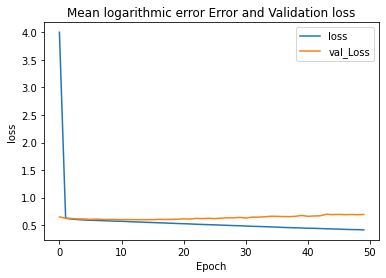

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['MSLE'])
#plt.plot(history.history['val_MSLE'])
plt.title('Mean logarithmic error Error and Validation loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_Loss'], loc='upper right')
plt.show()

**Dropout Function**

In [78]:
model1 = keras.models.Sequential(layers=0)
model1.add(keras.layers.InputLayer(input_shape=[130,]))  #input_layer with input=130 columns
model1.add(keras.layers.Dense(120, activation='relu'))
model1.add(keras.layers.Dropout(rate=0.2))
model1.add(keras.layers.Dense(80,activation='relu'))
model1.add(keras.layers.Dropout(rate=0.2)) 
model1.add(keras.layers.Dense(40,activation='relu'))
model1.add(keras.layers.Dropout(rate=0.2)) 
model1.add(keras.layers.Dense(20,activation='relu'))
model1.add(keras.layers.Dropout(rate=0.2))
model1.add(keras.layers.Dense(10,activation='relu'))
model1.add(keras.layers.Dropout(rate=0.2))
model1.add(keras.layers.Dense(1))

In [79]:
model1.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics = ['MSLE'])

In [80]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/Assignment6/my_keras_model1.h5",save_best_only=True)

In [81]:
history = model1.fit(X_train_scaled, Y_train, epochs=50,validation_data=(X_valid_scaled, Y_valid),callbacks=[checkpoint_cb])

Epoch 1/50
2980/2980 [==============================] - 6s 2ms/step - loss: 4.6052 - MSLE: 4.6052 - val_loss: 0.6563 - val_MSLE: 0.6563
Epoch 2/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.7651 - MSLE: 0.7651 - val_loss: 0.6316 - val_MSLE: 0.6316
Epoch 3/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.7218 - MSLE: 0.7218 - val_loss: 0.6226 - val_MSLE: 0.6226
Epoch 4/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.6999 - MSLE: 0.6999 - val_loss: 0.6167 - val_MSLE: 0.6167
Epoch 5/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.6960 - MSLE: 0.6960 - val_loss: 0.6130 - val_MSLE: 0.6130
Epoch 6/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.6876 - MSLE: 0.6876 - val_loss: 0.6187 - val_MSLE: 0.6187
Epoch 7/50
2980/2980 [==============================] - 6s 2ms/step - loss: 0.6898 - MSLE: 0.6898 - val_loss: 0.6083 - val_MSLE: 0.6083
Epoch 8/50
2980/2980 [==========================

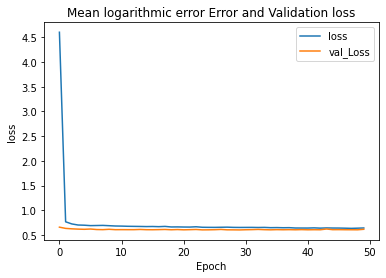

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['MSLE'])
#plt.plot(history.history['val_MSLE'])
plt.title('Mean logarithmic error Error and Validation loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_Loss'], loc='upper right')
plt.show()

## L1 LOSS

In [83]:
from tensorflow.keras import regularizers
model2 = keras.models.Sequential(layers=0)
model2.add(keras.layers.InputLayer(input_shape=[130,]))  #input_layer with input=130 columns
model2.add(keras.layers.Dense(120, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l1(0.02)))
model2.add(keras.layers.Dense(80,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.02))) 
model2.add(keras.layers.Dense(40,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.02))) 
model2.add(keras.layers.Dense(20,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.02)))
model2.add(keras.layers.Dense(10,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l1(0.02)))
model2.add(keras.layers.Dense(1))

In [84]:
model2.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics = ['MSLE'])

In [85]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/Assignment6/my_keras_model2.h5",save_best_only=True)

In [86]:
history = model2.fit(X_train_scaled, Y_train, epochs=30,validation_data=(X_valid_scaled, Y_valid),callbacks=[checkpoint_cb])

Epoch 1/30
2980/2980 [==============================] - 6s 2ms/step - loss: 16.9667 - MSLE: 5.0585 - val_loss: 4.2516 - val_MSLE: 1.0919
Epoch 2/30
2980/2980 [==============================] - 6s 2ms/step - loss: 3.0084 - MSLE: 0.9848 - val_loss: 2.3488 - val_MSLE: 0.9395
Epoch 3/30
2980/2980 [==============================] - 6s 2ms/step - loss: 2.0553 - MSLE: 0.8580 - val_loss: 1.8394 - val_MSLE: 0.8091
Epoch 4/30
2980/2980 [==============================] - 6s 2ms/step - loss: 1.6961 - MSLE: 0.7634 - val_loss: 1.6099 - val_MSLE: 0.7474
Epoch 5/30
2980/2980 [==============================] - 6s 2ms/step - loss: 1.5277 - MSLE: 0.7289 - val_loss: 1.4929 - val_MSLE: 0.7245
Epoch 6/30
2980/2980 [==============================] - 6s 2ms/step - loss: 1.4658 - MSLE: 0.7189 - val_loss: 1.4592 - val_MSLE: 0.7206
Epoch 7/30
2980/2980 [==============================] - 6s 2ms/step - loss: 1.4342 - MSLE: 0.7146 - val_loss: 1.4249 - val_MSLE: 0.7242
Epoch 8/30
2980/2980 [=========================

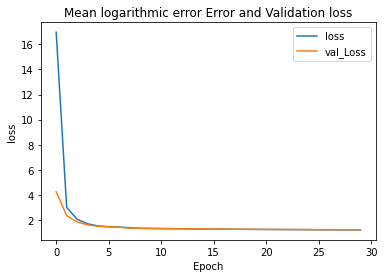

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['MSLE'])
#plt.plot(history.history['val_MSLE'])
plt.title('Mean logarithmic error Error and Validation loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_Loss'], loc='upper right')
plt.show()

### L2 LOSS

In [88]:
model3 = keras.models.Sequential(layers=0)
model3.add(keras.layers.InputLayer(input_shape=[130,]))  #input_layer with input=130 columns
model3.add(keras.layers.Dense(120, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.01)))
model3.add(keras.layers.Dense(80,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01))) 
model3.add(keras.layers.Dense(40,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01))) 
model3.add(keras.layers.Dense(20,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dense(10,activation='relu',kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dense(1))

In [89]:
model3.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics = ['MSLE'])

In [90]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/Assignment6/my_keras_model3.h5",save_best_only=True)

In [91]:
history = model3.fit(X_train_scaled, Y_train, epochs=50,validation_data=(X_valid_scaled, Y_valid),callbacks=[checkpoint_cb])

Epoch 1/50
2980/2980 [==============================] - 6s 2ms/step - loss: 6.6366 - MSLE: 3.4266 - val_loss: 2.2173 - val_MSLE: 0.8054
Epoch 2/50
2980/2980 [==============================] - 6s 2ms/step - loss: 1.8275 - MSLE: 0.7851 - val_loss: 1.6104 - val_MSLE: 0.8259
Epoch 3/50
2980/2980 [==============================] - 6s 2ms/step - loss: 1.4877 - MSLE: 0.8334 - val_loss: 1.4211 - val_MSLE: 0.8756
Epoch 4/50
2980/2980 [==============================] - 6s 2ms/step - loss: 1.3593 - MSLE: 0.8805 - val_loss: 1.3285 - val_MSLE: 0.9090
Epoch 5/50
2980/2980 [==============================] - 6s 2ms/step - loss: 1.2878 - MSLE: 0.9119 - val_loss: 1.2716 - val_MSLE: 0.9320
Epoch 6/50
2980/2980 [==============================] - 6s 2ms/step - loss: 1.2413 - MSLE: 0.9313 - val_loss: 1.2345 - val_MSLE: 0.9485
Epoch 7/50
2980/2980 [==============================] - 6s 2ms/step - loss: 1.2100 - MSLE: 0.9447 - val_loss: 1.2070 - val_MSLE: 0.9569
Epoch 8/50
2980/2980 [==========================

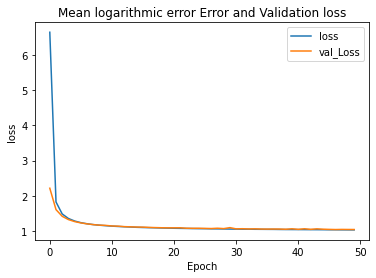

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['MSLE'])
#plt.plot(history.history['val_MSLE'])
plt.title('Mean logarithmic error Error and Validation loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_Loss'], loc='upper right')
plt.show()

In [94]:
mse_test = model1.evaluate(X_test_scaled, Y_test)
X_new = X_test_scaled[:100] 
y_pred = model1.predict(X_new)

1325/1325 [==============================] - 1s 903us/step - loss: 0.6046 - MSLE: 0.6046


In [96]:
Y_test[:18]

123819     69166
64441     123320
168580    103667
97104      72405
97807      18968
7887       46608
29774      98251
94901      82035
7951       98708
56395      10690
154684     60807
159035    116286
9193       15375
29402     109814
158614     37657
85145     140630
69476      88977
56421      82375
Name: target, dtype: int64

In [97]:
y_pred[:18]

array([[106992.42 ],
       [123664.14 ],
       [109764.734],
       [ 66092.836],
       [ 11409.933],
       [ 34368.293],
       [119874.31 ],
       [ 93084.   ],
       [ 56578.895],
       [ 34196.76 ],
       [ 60823.74 ],
       [132788.97 ],
       [ 56050.996],
       [ 70458.77 ],
       [ 56771.215],
       [128171.22 ],
       [ 29939.582],
       [ 83408.78 ]], dtype=float32)